<center><h1>Indra Rusyadi Adiwijaya<br/>20921001<br/>Laporan Kemajuan Riset XII<br/>
ANALISIS REGRESI LOGISTIK MULTINOMIAL</h1><br/>SK6091 Independent Research in Computational Science 1<br/>19 November 2021</center>

<center><h1>SVM CLASSIFICATION DAN MENAMPILKAN PREDICTION REPORT DENGAN CONFUSION MATRIX PADA DATA MONITORING & EVALUASI TENANT BIT BPPT</h1></center>
<hr>

## Load dataset

Dataset yang digunakan adalah dataset yang berasal dari data MONEV tenant Balai Inkubator Teknologi BPPT menggunakan Balanced Scorecard (BSC) yakni metode pengukuran hasil kerja yang digunakan perusahaan atau biasa disebut dengan strategi menajemen. Informasi tiap kolom sebagai berikut:

__Informasi Atribut pada Data Tersebut :__

1. __Nama Tenant__
2. __Bidang Teknologi__ 
3. __Omset__
4. __Jumlah Tenaga Kerja__
5. __Score MONEV__
6. __Predikat MONEV__

In [1]:
import seaborn as sns #Untuk memanggil data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report #Untuk mengukur pemodelan klasifikasi (F1 score, Sensitivity, Recall dsb) 
from sklearn.metrics import accuracy_score #Untuk mengukur baik tidaknya model yang digunakan 
from sklearn.model_selection import train_test_split #Split data training dan data test
from sklearn.linear_model import LogisticRegression #Menampung pemodelan regresi logistic
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("datasets/bit.csv")
#data= sns.load_dataset("tenant_bit")
data

,Nama.Tenant,Bidang.Teknologi,Omset,Tenaga_Kerja,Score,Predikat
0,CV. Sentra Susu Cipageuran,Pertanian & Tahan Pangan,360000000,5,190,FAIR
1,CV Gerbang Organik Nusantara,Pertanian & Tahan Pangan,250000000,3,159,FAIR
2,PT. Agro Teknologi Pintar,ICT,230000000,5,296,EXCELLENT
3,PT. Mikata Sukses Mandiri,Pertanian & Tahan Pangan,3600000000,5,310,EXCELLENT
4,PT. Adhiguna Jaya Laboratorium,Pertanian & Tahan Pangan,500000000,5,223,GOOD
...,...,...,...,...,...,...
72,CV. Mabol Store,Pertanian & Tahan Pangan,17880924,10,133,DROP OUT
73,PT Bali Lengis Alus,Pertanian & Tahan Pangan,28539126,5,93,DROP OUT
74,MAS Food,Pertanian & Tahan Pangan,38806530,10,155,FAIR
75,Sentosa Quail Farm,Pertanian & Tahan Pangan,8627720,4,184,FAIR


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama.Tenant       77 non-null     object
 1   Bidang.Teknologi  77 non-null     object
 2   Omset             77 non-null     int64 
 3   Tenaga_Kerja      77 non-null     int64 
 4   Score             77 non-null     int64 
 5   Predikat          77 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.7+ KB


In [4]:
# Mengubah tipe data Bidang Teknologi & Predikat Kelulusan menjadi category

data['Bidang.Teknologi'] = data['Bidang.Teknologi'].astype('category')
data['Predikat'] = data['Predikat'].astype('category')
#data['Tenaga.Kerja'] = data['Tenaga.Kerja'].astype('int64')
#data_obj = data.select_dtypes(include='object').copy()
#data_obj.head()

In [5]:
# Mengecek tipe data kolom Bidang Teknologi

data['Bidang.Teknologi'].dtype

CategoricalDtype(categories=['Energi', 'Farmasi', 'Hankam', 'ICT', 'Kreatif',
                  'Material Maju', 'Pertanian & Tahan Pangan'],
, ordered=False)

In [6]:
# Mengecek tipe data kolom Predikat

data['Predikat'].dtype

CategoricalDtype(categories=['DROP OUT', 'EXCELLENT', 'FAIR', 'GOOD', 'VERY GOOD'], ordered=False)

In [7]:
# Mengaplikasikan Endcoding kolom Bidang Teknologi menggunakan .cat.codes

data['BidTek-encode'] = data['Bidang.Teknologi'].cat.codes
data.head()

,Nama.Tenant,Bidang.Teknologi,Omset,Tenaga_Kerja,Score,Predikat,BidTek-encode
0,CV. Sentra Susu Cipageuran,Pertanian & Tahan Pangan,360000000,5,190,FAIR,6
1,CV Gerbang Organik Nusantara,Pertanian & Tahan Pangan,250000000,3,159,FAIR,6
2,PT. Agro Teknologi Pintar,ICT,230000000,5,296,EXCELLENT,3
3,PT. Mikata Sukses Mandiri,Pertanian & Tahan Pangan,3600000000,5,310,EXCELLENT,6
4,PT. Adhiguna Jaya Laboratorium,Pertanian & Tahan Pangan,500000000,5,223,GOOD,6


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nama.Tenant       77 non-null     object  
 1   Bidang.Teknologi  77 non-null     category
 2   Omset             77 non-null     int64   
 3   Tenaga_Kerja      77 non-null     int64   
 4   Score             77 non-null     int64   
 5   Predikat          77 non-null     category
 6   BidTek-encode     77 non-null     int8    
dtypes: category(2), int64(3), int8(1), object(1)
memory usage: 3.3+ KB


In [9]:
#X=data.iloc[:, :-1] #Semua baris kecuali kolom paling kanan ":-1"
X=data[['BidTek-encode','Tenaga_Kerja','Omset']]
#X=data[['Score']]
y=data['Predikat'] #Menagmbil kolom "Predikat"
print("Berikut ini tampilan data X")
print(X.head()) #Variabel Independen (X)
print("")
print("Berikut ini tampilan data Y")
print(y.head()) #Variabel Dependen (Y)

Berikut ini tampilan data X
   BidTek-encode  Tenaga_Kerja       Omset
0              6             5   360000000
1              6             3   250000000
2              3             5   230000000
3              6             5  3600000000
4              6             5   500000000

Berikut ini tampilan data Y
0         FAIR
1         FAIR
2    EXCELLENT
3    EXCELLENT
4         GOOD
Name: Predikat, dtype: category
Categories (5, object): ['DROP OUT', 'EXCELLENT', 'FAIR', 'GOOD', 'VERY GOOD']


In [10]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #Data train 70% Data Test 30%

In [11]:
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
#data.fillna(999, inplace=True)

model=LogisticRegression(multi_class='auto') #Membentuk model regresi logstik, "auto" supaya python mendeteksi
model.fit(X_train,y_train) #Fit model logistik regresion data train 70%


#data.fillna(df.mean(), inplace=True)


LogisticRegression()

In [12]:
print("Berikut ini tampilan data x_test")
print(x_test.head()) 

Berikut ini tampilan data x_test
    BidTek-encode  Tenaga_Kerja       Omset
69              3             1    46805730
55              6            12  5000000000
76              5             7    16997291
33              5             5    34113292
13              5             3    32000000


In [13]:
model.predict_proba(x_test)[0:5] #Prediksi Probabilitas x_test di 5 data pertama

array([[0.2017194 , 0.20337078, 0.19902839, 0.19878191, 0.19709952],
       [0.25508804, 0.60945567, 0.06076044, 0.05322696, 0.02146889],
       [0.20062561, 0.20122049, 0.19964952, 0.19955969, 0.19894469],
       [0.20125419, 0.20245365, 0.19929387, 0.19911396, 0.19788432],
       [0.20117666, 0.20230117, 0.19933793, 0.19916912, 0.19801512]])

In [14]:
predictions=model.predict(x_test)
predictions

array(['EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT',
       'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT',
       'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT',
       'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT',
       'EXCELLENT', 'EXCELLENT', 'EXCELLENT', 'EXCELLENT'], dtype=object)

In [15]:
print(classification_report(y_test,predictions))
print("akurasi hasil prediksi adalah sebesar:")
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

    DROP OUT       0.00      0.00      0.00         3
   EXCELLENT       0.33      1.00      0.50         8
        FAIR       0.00      0.00      0.00         5
        GOOD       0.00      0.00      0.00         4
   VERY GOOD       0.00      0.00      0.00         4

    accuracy                           0.33        24
   macro avg       0.07      0.20      0.10        24
weighted avg       0.11      0.33      0.17        24

akurasi hasil prediksi adalah sebesar:
0.3333333333333333


C:\Users\Indra_BIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indra_BIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indra_BIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classifier akan dibuat terlebih dahulu dengan menggunakan library svm. Kemudian classification report dapat ditampilkan dengan library classification_report. Caranya adalah sebagai berikut:

In [16]:
#menggunakan SVM library untuk membuat SVM classifier
#classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
#classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
#y_predict = classifier.predict(X_test)
 
#menampilkan classification report
#print(classification_report(y_test, y_predict))


Menampilkan detail dari hasil prediksi yang diberikan oleh classification model yang di buat dengan confusion matrix. Caranya adalah sebagai berikut:

Text(69.0, 0.5, 'Truth')

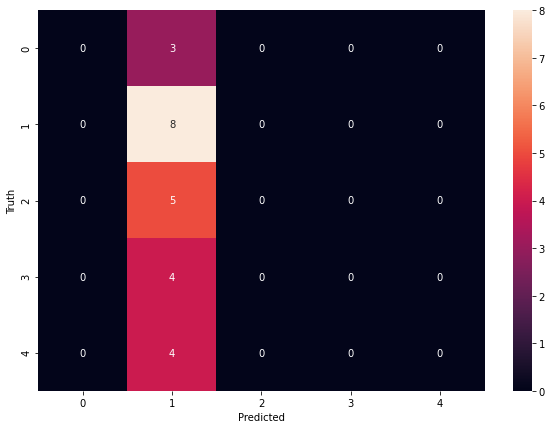

In [17]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, predictions)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<hr>

Referensi @ <a href="https://ilmudatapy.com/">ilmudatapy.com</a>